# Iris Flower Classification

## Dataset

The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The Use of multiple measurements in Taxonomic Problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. This dataset became a typical test case for many statistical classification techniques in machine learning such as support vector machines.

## Objective

The Iris flower dataset consists of three species: setosa, versicolor, and virginica. These species can be distinguished based on their measurements. Now, imagine that you have the measurements of Iris flowers categorized by their respective species. Your objective is to train a machine learning model that can learn from these measurements and accurately classify the Iris flowers into their respective species. Use the Iris dataset to develop a model that can classify iris flowers into different species based on their sepal and petal measurements. This dataset is widely used for introductory classification tasks.

In [1]:
# Import the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Read The Dataset

In [4]:
df=pd.read_csv("C:/Users/ANGEL SARA PETER/Downloads/IRIS Flower.csv")

In [5]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Exploratory Data Analysis

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
dp = df.duplicated().sum()

In [11]:
dp

3

In [12]:
print(df.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [13]:
print(df['species'].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64


In [14]:
df.shape

(150, 5)

## Data Wrangling

In [15]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [16]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [17]:
df['species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: species, dtype: int64

## Data Visualization

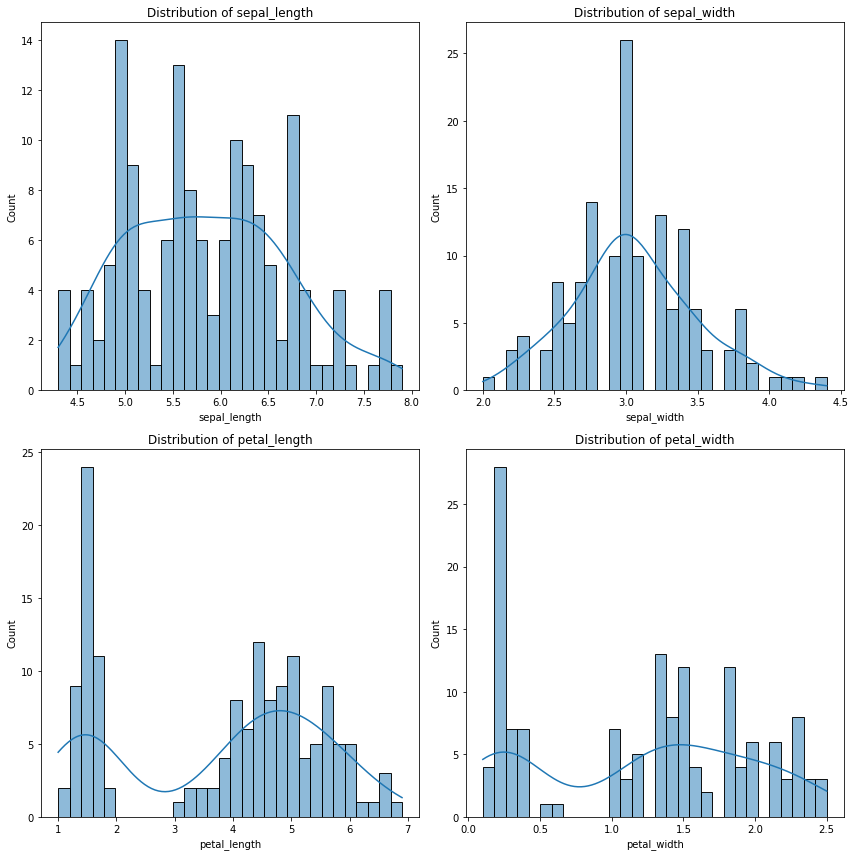

In [18]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
plt.figure(figsize=(12, 12))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Sepal Length vs Width')

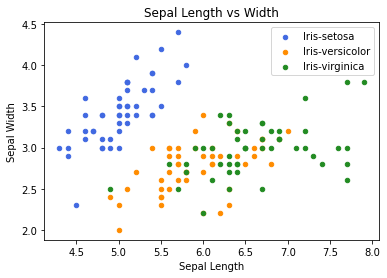

In [19]:
fig = df[df.species == 'Iris-setosa'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='royalblue',label='Iris-setosa')
df[df.species == 'Iris-versicolor'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='darkorange',label='Iris-versicolor',ax=fig)
df[df.species == 'Iris-virginica'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='forestgreen',label='Iris-virginica',ax=fig)
fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length vs Width')

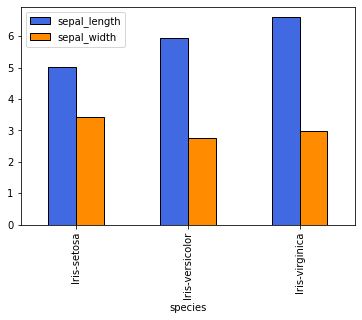

In [20]:
sepal_stats = df.groupby('species')[['sepal_length', 'sepal_width']].mean()

# Plot the data as a bar plot

ax = sepal_stats.plot(kind='bar', color=['royalblue', 'darkorange'], edgecolor='black')

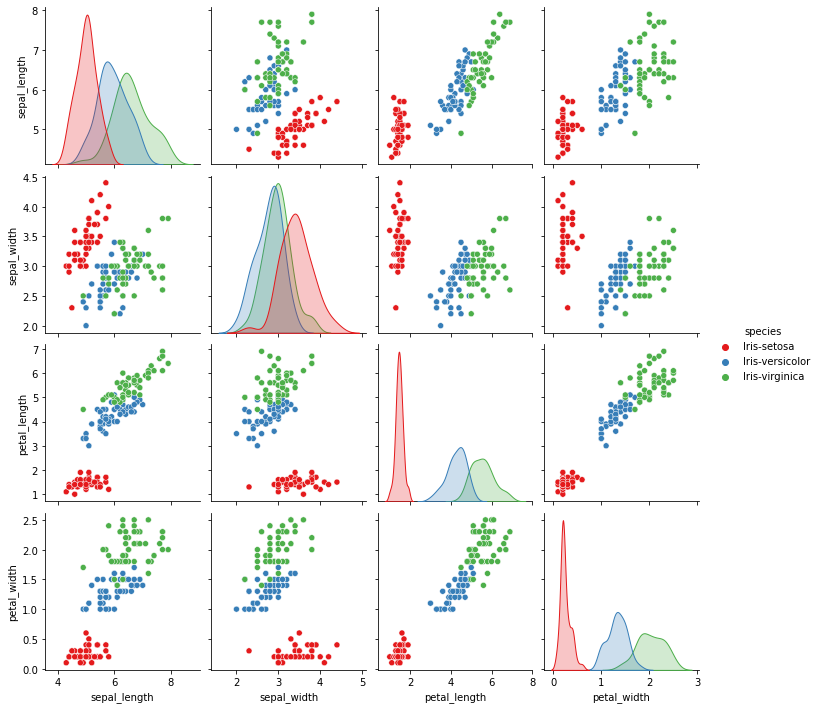

In [21]:
sns.pairplot(df, hue='species',palette='Set1')

Text(0.5, 1.0, 'Petal Length vs Width')

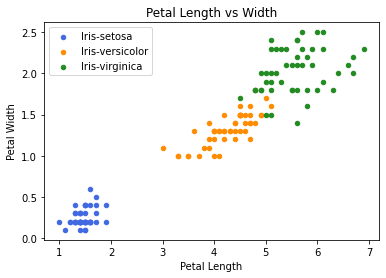

In [22]:
fig = df[df.species == 'Iris-setosa'].plot(kind='scatter',x='petal_length',y='petal_width',color='royalblue',label='Iris-setosa')
df[df.species == 'Iris-versicolor'].plot(kind='scatter',x='petal_length',y='petal_width',color='darkorange',label='Iris-versicolor',ax=fig)
df[df.species == 'Iris-virginica'].plot(kind='scatter',x='petal_length',y='petal_width',color='forestgreen',label='Iris-virginica',ax=fig)

fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length vs Width')

<AxesSubplot:xlabel='species', ylabel='petal_width'>

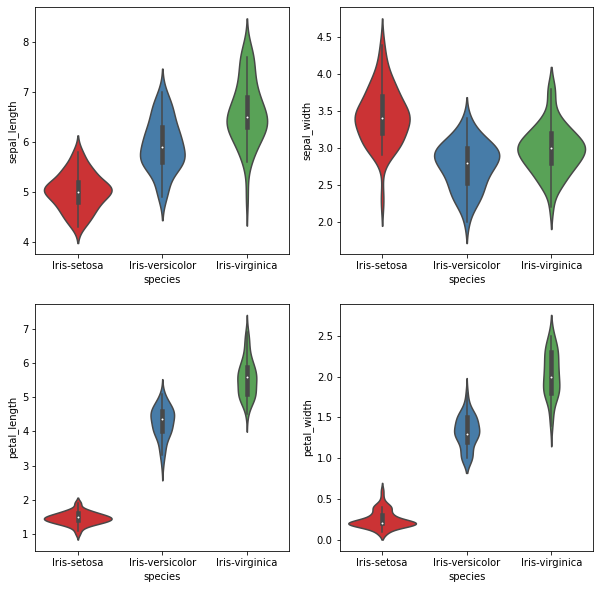

In [23]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.violinplot(data=df, x='species',y='sepal_length',palette='Set1')
plt.subplot(2,2,2)
sns.violinplot(data=df, x='species',y='sepal_width',palette='Set1')

plt.subplot(2,2,3)
sns.violinplot(data=df,x='species', y='petal_length',palette='Set1')
plt.subplot(2,2,4)
sns.violinplot(data=df, x='species', y='petal_width',palette='Set1')

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

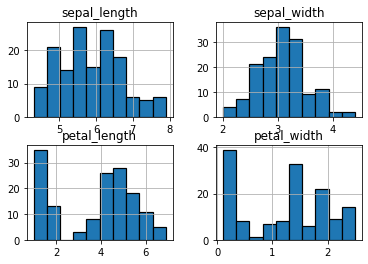

In [24]:
df.hist(edgecolor='black',linewidth=1.2)

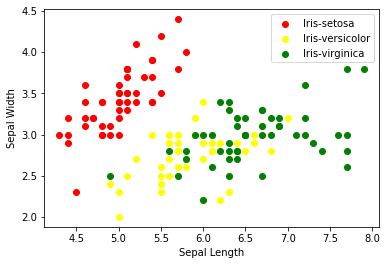

In [25]:
# Sepal Length vs Sepal Width

colors = ['red', 'yellow', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c=colors[i], label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

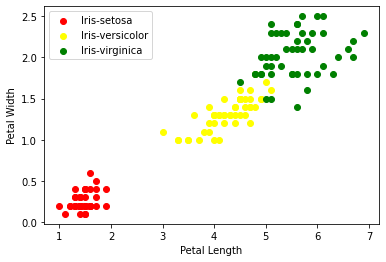

In [26]:
# Petal Length vs Petal Width

for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c=colors[i], label=species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()


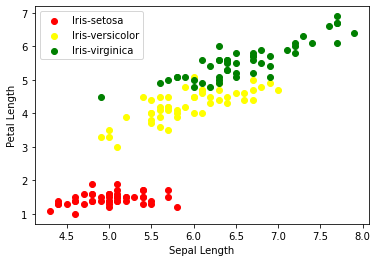

In [27]:
# Sepal Length vs Petal Length

for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c=colors[i], label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()
plt.show()

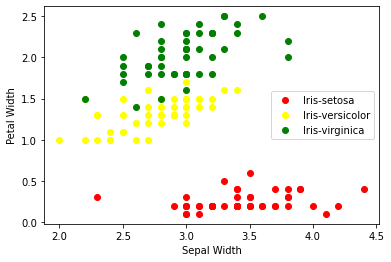

In [28]:
# Sepal Width vs Petal Width

for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c=colors[i], label=species[i])
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

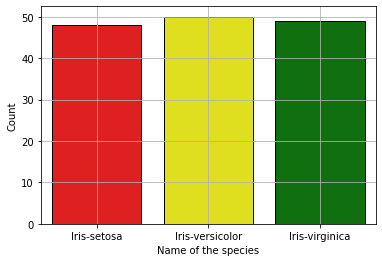

In [29]:
sns.countplot(data=df, x='species', palette=colors, ec='black')
plt.xlabel("Name of the species")
plt.ylabel("Count")
plt.grid(True)
plt.show()

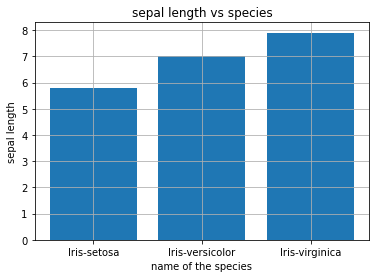

In [30]:
plt.bar(df['species'],df['sepal_length'])
plt.title("sepal length vs species")
plt.xlabel("name of the species")
plt.ylabel("sepal length")
plt.grid(True)
plt.show()

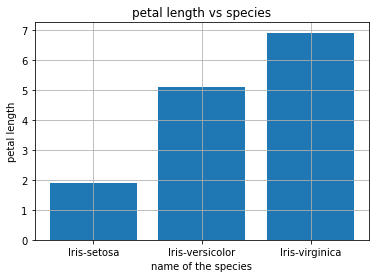

In [31]:
plt.bar(df['species'],df['petal_length'])
plt.title("petal length vs species")
plt.xlabel("name of the species")
plt.ylabel("petal length")
plt.grid(True)
plt.show()

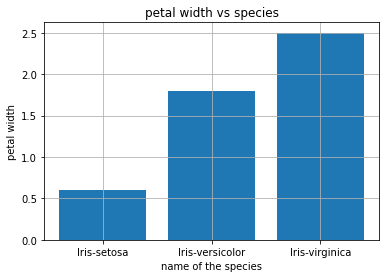

In [32]:
plt.bar(df['species'],df['petal_width'])
plt.title("petal width vs species")
plt.xlabel("name of the species")
plt.ylabel("petal width")
plt.grid(True)
plt.show()

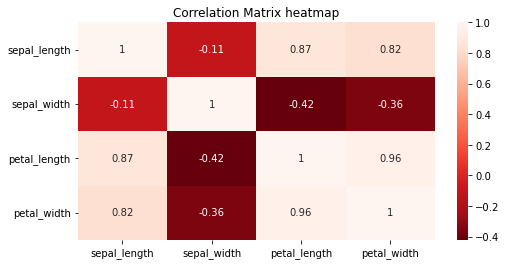

In [33]:
# Calculate correlation matrix (excluding non-numeric column 'species')

numeric_df = df.drop(columns=['species'])
corr_matrix = numeric_df.corr()

# Plot correlation heatmap

plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r')
plt.title('Correlation Matrix heatmap')
plt.show()

## Feature Engineering & Data Pre-processing

In [34]:
# Encode the categorical column 'Species'

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
unique_species = df['species'].unique()
print("Encoded Species Values:")
print(unique_species)

Encoded Species Values:
[0 1 2]


## Data Scaling and Splitting

In [35]:
df_dum=df

In [36]:
x =df.drop('species',axis=1)
y = df['species']
print(x.shape)
print(y.shape)

(147, 4)
(147,)


In [37]:
# Split data into train and test

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(102, 4)
(45, 4)
(102,)
(45,)


In [40]:
# Create Function for model Evaluation

In [41]:
def eval_model(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    cr =  classification_report(ytest,ypred)
    print('Confusion_Matrix\n',cm)
    print('Classification Report\n',cr)
   

In [42]:
    
def model_score(model,x_train,x_test,y_train,y_test,mname):
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
    res = pd.DataFrame({'Train_Acc':train_acc,'Test_Acc':test_acc},index=[mname])
    return res

## Model Implementation & Evaluation

In [43]:
# Import All Models

In [44]:
from sklearn.metrics import confusion_matrix, classification_report

In [45]:
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## 1.LogisticRegression

In [46]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [47]:
ypred_lr = lr.predict(x_test)

In [48]:
ypred_lr

array([2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 1, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 1, 2,
       1])

In [49]:
eval_model(y_test,ypred_lr)

Confusion_Matrix
 [[17  0  0]
 [ 0 11  1]
 [ 0  2 14]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.85      0.92      0.88        12
           2       0.93      0.88      0.90        16

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



In [50]:
conf_matrix = confusion_matrix(y_test, ypred_lr)

In [51]:
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[17  0  0]
 [ 0 11  1]
 [ 0  2 14]]


In [53]:
species_mapping = {species: idx for idx, species in enumerate(df['species'].unique())}
df['species'] = df['species'].map(species_mapping)

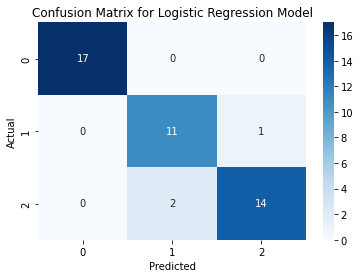

In [54]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=species_mapping.keys(), yticklabels=species_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

In [55]:
lr_res = model_score(lr,x_train,x_test,y_train,y_test,'LogReg')
lr_res

,Train_Acc,Test_Acc
LogReg,0.990196,0.933333


In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## 2.DecisionTreeClassifier

In [57]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=8,min_samples_split=20,
                            min_samples_leaf=10)
dt.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=8, min_samples_leaf=10, min_samples_split=20)

In [58]:
ypred_dt = dt.predict(x_test)
eval_model(y_test,ypred_dt)

Confusion_Matrix
 [[17  0  0]
 [ 0 11  1]
 [ 0  4 12]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.73      0.92      0.81        12
           2       0.92      0.75      0.83        16

    accuracy                           0.89        45
   macro avg       0.89      0.89      0.88        45
weighted avg       0.90      0.89      0.89        45



In [59]:
conf_matrix = confusion_matrix(y_test, ypred_dt)

In [60]:
conf_matrix

array([[17,  0,  0],
       [ 0, 11,  1],
       [ 0,  4, 12]], dtype=int64)

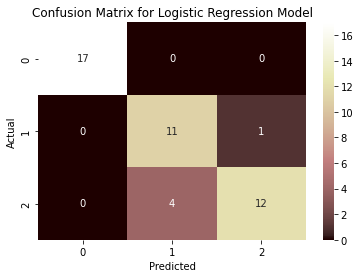

In [61]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='pink', xticklabels=species_mapping.keys(), yticklabels=species_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

In [62]:
dt_res = model_score(dt,x_train,x_test,y_train,y_test,'Decision Tree')
dt_res 

,Train_Acc,Test_Acc
Decision Tree,0.970588,0.888889


## 3. KNeighborsClassifier

In [63]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [64]:
ypred_knn = knn.predict(x_test)
eval_model(y_test,ypred_knn)

Confusion_Matrix
 [[17  0  0]
 [ 0 11  1]
 [ 0  2 14]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.85      0.92      0.88        12
           2       0.93      0.88      0.90        16

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



In [65]:
conf_matrix = confusion_matrix(y_test, ypred_lr)

In [66]:
conf_matrix

array([[17,  0,  0],
       [ 0, 11,  1],
       [ 0,  2, 14]], dtype=int64)

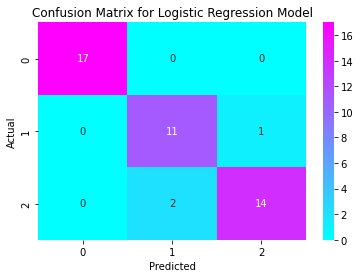

In [67]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='cool', xticklabels=species_mapping.keys(), yticklabels=species_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

In [68]:
knn_res = model_score(knn,x_train,x_test,y_train,y_test,'KNN Classifier')
knn_res  

,Train_Acc,Test_Acc
KNN Classifier,0.980392,0.933333


## 4.Support Vector Machine

In [69]:
from sklearn.svm import SVC
model1 = SVC()
model1.fit(x_train,y_train)

SVC()

In [70]:
pred_y = model1.predict(x_test)
eval_model(y_test,pred_y)

Confusion_Matrix
 [[17  0  0]
 [ 0 11  1]
 [ 0  1 15]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.92      0.92      0.92        12
           2       0.94      0.94      0.94        16

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [71]:
conf_matrix = confusion_matrix(y_test, pred_y)

In [72]:
conf_matrix

array([[17,  0,  0],
       [ 0, 11,  1],
       [ 0,  1, 15]], dtype=int64)

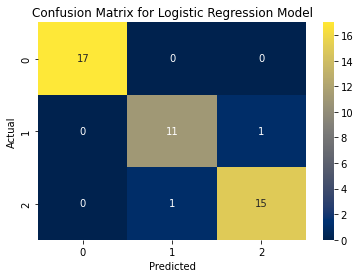

In [73]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='cividis', xticklabels=species_mapping.keys(), yticklabels=species_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

In [74]:
svm_res = model_score(knn,x_train,x_test,y_train,y_test,'Support Vector Machine')
svm_res  

,Train_Acc,Test_Acc
Support Vector Machine,0.980392,0.933333


## 5.GaussianNB

In [75]:

from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(x_train,y_train)

GaussianNB()

In [76]:
y_pred3 = model3.predict(x_train)
eval_model(y_test,pred_y)

Confusion_Matrix
 [[17  0  0]
 [ 0 11  1]
 [ 0  1 15]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.92      0.92      0.92        12
           2       0.94      0.94      0.94        16

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [77]:
conf_matrix = confusion_matrix(y_test, pred_y)

In [78]:
conf_matrix 

array([[17,  0,  0],
       [ 0, 11,  1],
       [ 0,  1, 15]], dtype=int64)

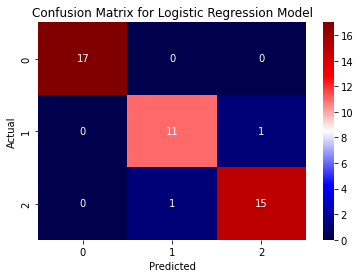

In [79]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='seismic', xticklabels=species_mapping.keys(), yticklabels=species_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

In [80]:
gnb_res = model_score(knn,x_train,x_test,y_train,y_test,'GaussianNB')
gnb_res  

,Train_Acc,Test_Acc
GaussianNB,0.980392,0.933333


## 6. RandomForestClassifier

In [81]:
rf = RandomForestClassifier(n_estimators=75,criterion='gini',max_depth=11,min_samples_split=14)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=11, min_samples_split=14, n_estimators=75)

In [82]:
ypred_rf  = rf.predict(x_test)
eval_model(y_test,ypred_rf)

Confusion_Matrix
 [[17  0  0]
 [ 0 11  1]
 [ 0  1 15]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.92      0.92      0.92        12
           2       0.94      0.94      0.94        16

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [83]:
conf_matrix = confusion_matrix(y_test, ypred_rf)

In [84]:
conf_matrix

array([[17,  0,  0],
       [ 0, 11,  1],
       [ 0,  1, 15]], dtype=int64)

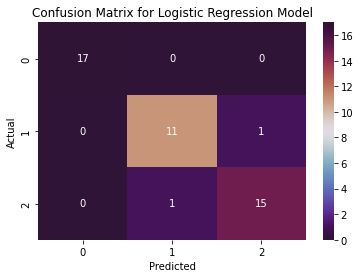

In [85]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='twilight_shifted', xticklabels=species_mapping.keys(), yticklabels=species_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

In [86]:
rf_res = model_score(rf,x_train,x_test,y_train,y_test,'Random Forest')
rf_res 

,Train_Acc,Test_Acc
Random Forest,0.990196,0.955556


##  Results in Tabular Form

In [87]:
res = pd.concat([lr_res,dt_res,knn_res,svm_res,gnb_res,rf_res])
res

,Train_Acc,Test_Acc
LogReg,0.990196,0.933333
Decision Tree,0.970588,0.888889
KNN Classifier,0.980392,0.933333
Support Vector Machine,0.980392,0.933333
GaussianNB,0.980392,0.933333
Random Forest,0.990196,0.955556


## Model Selection

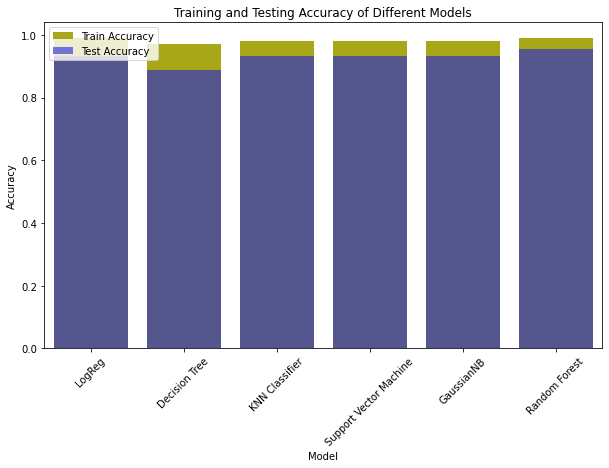

In [88]:
data = {
    'Model': ['LogReg', 'Decision Tree', 'KNN Classifier', 'Support Vector Machine', 'GaussianNB', 'Random Forest'],
    'Train_Acc': [0.990196, 0.970588, 0.980392, 0.980392, 0.980392, 0.990196],
    'Test_Acc': [0.933333, 0.888889, 0.933333, 0.933333, 0.933333, 0.955556]
}
res = pd.DataFrame(data)

# Set the figure size

plt.figure(figsize=(10, 6))

train_colors = sns.color_palette("winter", len(res)) 
test_colors = sns.color_palette("Oranges", len(res)) 

# Plot the training and testing accuracy

sns.barplot(x='Model', y='Train_Acc', data=res, color='y', label='Train Accuracy')
sns.barplot(x='Model', y='Test_Acc', data=res, color='b', label='Test Accuracy', alpha=0.6)

# Add labels and title

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy of Different Models')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Save the best model and Load the model

In [89]:
import pickle

In [90]:
from sklearn import metrics

# Load the dataset

dataset = pd.read_csv("C:/Users/ANGEL SARA PETER/Downloads/IRIS Flower.csv")

# Split the dataset into (X) and target (y)

x = dataset.drop('species', axis=1)
y = dataset['species']

# Split the data into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Random forest classifier

classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(x_train, y_train)

# Make predictions on the test 

y_pred = classifier.predict(x_test)

# Evaluate the accuracy of the model

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Save the model

pickle.dump(classifier,open('rf_model_of_IRIS_proj.pkl','wb'))

# Load the model

model = pickle.load(open('rf_model_of_IRIS_proj.pkl','rb'))

# Make predictions using the loaded model

new_predictions = model.predict(x_test)

# Evaluate the loaded model

loaded_accuracy = metrics.accuracy_score(y_test, new_predictions)
print("Accuracy of the loaded model:", loaded_accuracy)

Accuracy: 1.0
Accuracy of the loaded model: 1.0


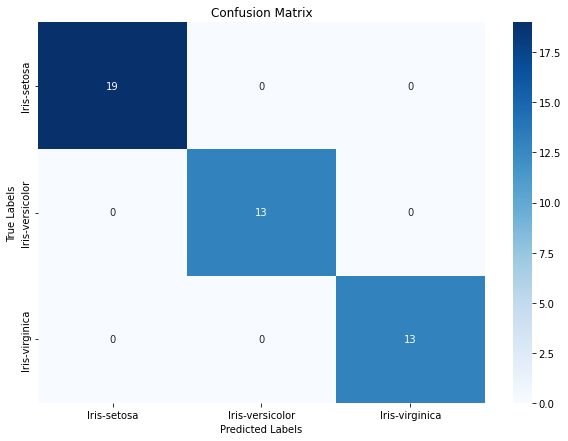

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix

cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)

# Plot confusion matrix

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()